<a href="https://colab.research.google.com/github/vaasanthk/Machine-Learning/blob/master/Jigsaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q pyicu
!pip install -q pycld2
!pip install -q polyglot
!pip install -q textstat
!pip install -q googletrans

     |████████████████████████████████| 225kB 4.5MB/s 
     |████████████████████████████████| 41.4MB 106kB/s 
     |████████████████████████████████| 133kB 7.5MB/s 
     |████████████████████████████████| 102kB 5.5MB/s 
     |████████████████████████████████| 3.0MB 22.8MB/s 


In [37]:
%pylab inline
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#plotly
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.express as px, plotly.figure_factory as ff
from polyglot.detect import Detector
import plotly.graph_objects as go
from PIL import Image

from tqdm import tqdm
tqdm.pandas()


from nltk.sentiment.vader import SentimentIntensityAnalyzer
import textstat
from nltk.corpus import stopwords




Populating the interactive namespace from numpy and matplotlib


In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Dataset/jigsaw-toxic-comment-train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Dataset/test.csv')
validation_data = pd.read_csv('/content/drive/My Drive/Dataset/validation.csv')

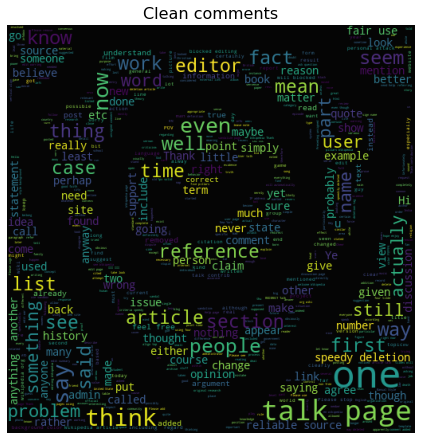

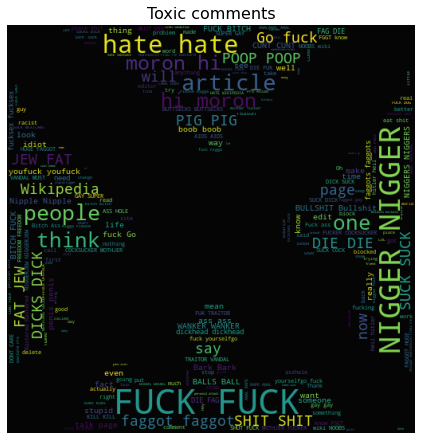

In [58]:
clean_mask = np.array(Image.open('/content/safe-zone.png'))
clean_mask = clean_mask[:,:,1]

subset = train_data.query('toxic == 0')
text = subset.comment_text.values
wc = WordCloud(max_words=2000, mask=clean_mask, stopwords=STOPWORDS)
wc.generate(" ".join(text))
plt.figure(figsize = (7.5, 7.5))
plt.axis('off')
plt.title('Clean comments', fontsize = 16)
plt.imshow(wc.recolor(colormap='viridis', random_state=17),
           alpha = 0.98)
plt.show()

clean_mask = np.array(Image.open('/content/swords.png'))
clean_mask = clean_mask[:,:,1]


subset = train_data.query('toxic == 1')
text = subset.comment_text.values
wc = WordCloud(max_words=2000, mask=clean_mask, stopwords=STOPWORDS)
wc.generate(" ".join(text))
plt.figure(figsize = (7.5, 7.5))
plt.axis('off')
plt.title('Toxic comments', fontsize = 16)
plt.imshow(wc.recolor(colormap='viridis', random_state=17),
           alpha = 0.98)
plt.show()



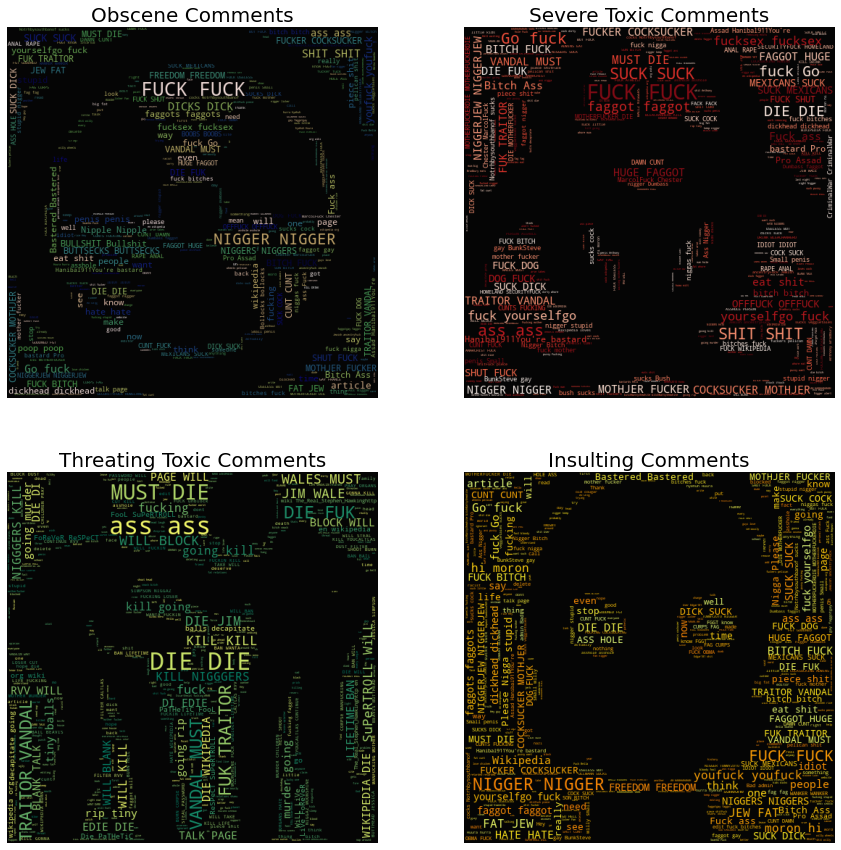

In [100]:
# obscene vs. sever toxic vs. threat vs. insult
toxic_mask = np.array(Image.open("/content/toxic-sign.png"))
toxic_mask = toxic_mask[:, :, 1]

subset = train_data.query('obscene == 1')
text = subset.comment_text.values
wc = WordCloud(max_words=4000,
               mask = toxic_mask, stopwords = STOPWORDS)
wc.generate(' '.join(text))
plt.figure(figsize = (15, 15))
plt.subplot(221)
plt.title('Obscene Comments', fontsize = 20)
plt.axis('off')
plt.imshow(wc.recolor(colormap='gist_earth', random_state=244),
            alpha = 0.98)

# Severe toxic
plt.subplot(222)
toxic_mask = np.array(Image.open("/content/biohazard-symbol.png"))
toxic_mask = toxic_mask[:, :, 1]

subset = train_data.query('severe_toxic == 1')
text = subset.comment_text.values
wc = WordCloud(max_words=2000,
               mask = toxic_mask, stopwords = STOPWORDS)
wc.generate(' '.join(text))
plt.title('Severe Toxic Comments', fontsize = 20)
plt.axis('off')
plt.imshow(wc.recolor(colormap='Reds', random_state=244),
            alpha = 0.98)

# Threat comment
plt.subplot(223)
toxic_mask = np.array(Image.open("/content/anger.png"))
toxic_mask = toxic_mask[:, :, 1]

subset = train_data.query('threat == 1')
text = subset.comment_text.values
wc = WordCloud(background_color='black', max_words=2000,
               mask = toxic_mask, stopwords = STOPWORDS)
wc.generate(' '.join(text))
plt.title('Threating Toxic Comments', fontsize = 20)
plt.axis('off')
plt.imshow(wc.recolor(colormap='summer', random_state=244),
            alpha = 0.98)

#insult
plt.subplot(224)
toxic_mask = np.array(Image.open("/content/gas-mask.png"))
toxic_mask = toxic_mask[:, :, 1]

subset = train_data.query('insult == 1')
text = subset.comment_text.values
wc = WordCloud(max_words=2000,
               mask = toxic_mask, stopwords = STOPWORDS)
wc.generate(' '.join(text))
plt.title('Insulting Comments', fontsize = 20)
plt.axis('off')
plt.imshow(wc.recolor(colormap='Wistia', random_state=244),
            alpha = 0.98);

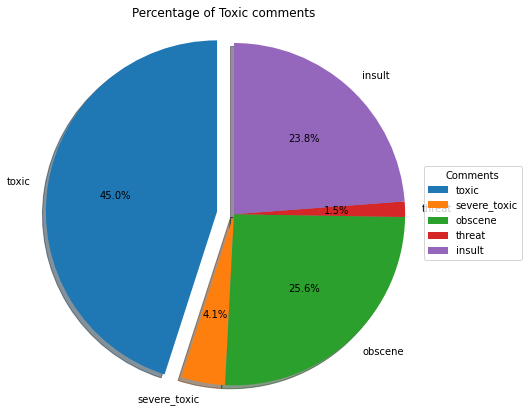

In [123]:
labels = train_data.columns[2:7]
values = train_data.iloc[:, 2:7].sum().values
explode = (0.1, 0.0, 0, 0, 0) 

fig1, ax1 = plt.subplots(figsize = (7, 7))
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Toxic comments')
ax1.legend(
          title="Comments",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [130]:
configure_plotly_browser_state()
fig = go.Figure(data=[
    go.Bar(y=train_data.columns[2:7],
           x=train_data.iloc[:, 2:7].sum().values, marker=dict(color=px.colors.qualitative.Plotly))
])

fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.75
fig.update_traces(orientation="h")
fig.update_layout(title_text="Bar chart of labels", template="plotly_white")
fig.show()